In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


2025-01-22 07:58:04.911509: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-22 07:58:05.134471: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-22 07:58:05.349384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737532685.512772   14167 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737532685.559601   14167 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 07:58:05.924272: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [5]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 695s 3us/step


In [6]:
data_dir

'./datasets/flower_photos'

In [9]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [15]:
image_count=len(list(data_dir.glob('*/*/*.jpg')))
image_count

3670

In [19]:
roses=list(data_dir.glob('*/roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/873660804_37f5c6a46e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1801614110_bb9fa46830.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1666341535_99c6f7509f_n.jpg')]

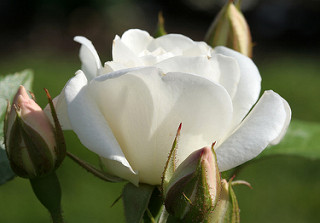

In [22]:
PIL.Image.open(str(roses[1]))

In [24]:
tulips=list(data_dir.glob('*/tulips/*.jpg'))
len(tulips)

799

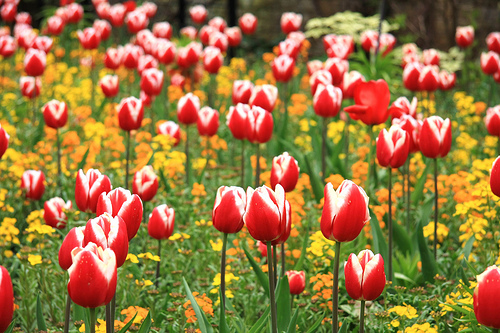

In [25]:
PIL.Image.open(str(tulips[0]))

In [26]:
flowers_images_dict={
    'rose':list(data_dir.glob('*/roses/*')),
    'daisy':list(data_dir.glob('*/daisy/*')),
    'dandelion':list(data_dir.glob('*/dandelion/*')),
    'sunflowers':list(data_dir.glob('*/sunflowers/*')),
    'tulips':list(data_dir.glob('*/tulips/*')),
}

In [27]:
flowers_images_dict['rose']

[PosixPath('datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/873660804_37f5c6a46e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1801614110_bb9fa46830.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1666341535_99c6f7509f_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5398974188_799753449c.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/295257304_de893fc94d.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5897035797_e67bf68124_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3278709893_ba4956a572_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/18741313803_1bbf842fc6_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1485142251_ca89254442.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/624188

In [28]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/flower_photos/daisy/3957488431_52a447c0e8_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/5602738326_97121e007d_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3456403987_5bd5fa6ece_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/14221848160_7f0a37c395.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/8063844363_db3f4dea85.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/267148092_4bb874af58.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/5435521200_92029bbe2b_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3468498624_d082f99e98.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3338077096_3a8ed0e2bc_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/5434914569_e9b982fde0_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2666572212_2caca8de9f_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/7215958

In [41]:
flowers_labels_dict={
    'rose':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [30]:
flowers_images_dict['rose'][0]

PosixPath('datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg')

In [32]:
str(flowers_images_dict['rose'][0])

'datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'

In [35]:
img=cv2.imread(str(flowers_images_dict['rose'][0]))
img

array([[[192, 175, 212],
        [195, 181, 222],
        [175, 165, 211],
        ...,
        [  6,   2,   1],
        [  0,   5,   0],
        [  0,  11,   0]],

       [[ 77,  69, 169],
        [ 83,  77, 178],
        [ 94,  90, 195],
        ...,
        [  6,  20,  19],
        [  2,   8,   3],
        [  5,  16,   6]],

       [[ 44,  31, 183],
        [ 29,  15, 170],
        [ 17,   1, 162],
        ...,
        [  1,  28,  32],
        [  4,   5,   3],
        [  4,  11,   4]],

       ...,

       [[ 86,  59, 176],
        [ 86,  66, 165],
        [ 91,  73, 167],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 94,  63, 178],
        [ 91,  65, 172],
        [ 90,  65, 175],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[103,  66, 190],
        [ 97,  64, 185],
        [ 90,  52, 188],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]]

In [34]:
img.shape

(240, 320, 3)

In [36]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [42]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
    # print(flower_name)
    # print(len(images))
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])